# MFCC extraction
### Dowload data set: http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

In [1]:
from os import listdir
from os.path import isdir, join
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [2]:
# Dataset path
dataset_path = 'data_speech_commands/' 

# Create and view all possible targets
targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(targets)
print('alltargets: ',len(targets))

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']
alltargets:  36


In [3]:
# Only keep some specified words
words = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'forward', 'backward']
targets = [a for a in words for b in targets if a == b]
print(targets)
print('targets selected: ',len(targets))

['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'forward', 'backward']
targets selected:  12


In [4]:
# See how many samples are in each
num_samples = 0
for target in targets:
    print(target,', ',len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

yes ,  4044
no ,  3941
up ,  3723
down ,  3917
left ,  3801
right ,  3778
on ,  3845
off ,  3745
stop ,  3872
go ,  3880
forward ,  1557
backward ,  1664
Total samples: 41767


In [5]:
# Settings
target_list = targets
feature_sets_file = 'mfcc_sets.npz'
win_len = 0.02
win_step = 0.01
num_mfcc = 20
len_mfcc = 99 # 10 ms samples

In [6]:
# Create list of filenames along with ground truth vector (y)
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)
    print(target,' => label: ', index)

data_speech_commands/yes
yes  => label:  0
data_speech_commands/no
no  => label:  1
data_speech_commands/up
up  => label:  2
data_speech_commands/down
down  => label:  3
data_speech_commands/left
left  => label:  4
data_speech_commands/right
right  => label:  5
data_speech_commands/on
on  => label:  6
data_speech_commands/off
off  => label:  7
data_speech_commands/stop
stop  => label:  8
data_speech_commands/go
go  => label:  9
data_speech_commands/forward
forward  => label:  10
data_speech_commands/backward
backward  => label:  11


In [7]:
# Check Y vector
for item in y:
    print(len(item))

4044
3941
3723
3917
3801
3778
3845
3745
3872
3880
1557
1664


In [8]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]
print(len(y), len(filenames))

41767 41767


In [9]:
# check
print(filenames[4043:4054])
print(y[4043:4054])

['ffd2ba2f_nohash_4.wav', '012c8314_nohash_0.wav', '0132a06d_nohash_0.wav', '0132a06d_nohash_1.wav', '0132a06d_nohash_2.wav', '0132a06d_nohash_3.wav', '0132a06d_nohash_4.wav', '0137b3f4_nohash_0.wav', '0137b3f4_nohash_1.wav', '0137b3f4_nohash_2.wav', '0137b3f4_nohash_3.wav']
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [10]:
# Function: Create MFCC from given path
from scipy.io import wavfile

def calc_mfcc(path):
    
    # Load wavefile
    fs, signal = wavfile.read(path)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=win_len,
                                            winstep=win_step,
                                            numcep=num_mfcc,
                                            winfunc=np.hanning)

    return mfccs.transpose()

In [11]:
# Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [12]:
# extract features into sets
len_y_orig = len(y)
print(len_y_orig)
x, y, prob = extract_features(filenames, y)
print('Removed percentage:', prob / len_y_orig)


41767
Dropped: 1 (20, 92)
Dropped: 21 (20, 93)
Dropped: 47 (20, 85)
Dropped: 49 (20, 75)
Dropped: 51 (20, 76)
Dropped: 54 (20, 76)
Dropped: 55 (20, 89)
Dropped: 71 (20, 81)
Dropped: 129 (20, 89)
Dropped: 133 (20, 89)
Dropped: 134 (20, 77)
Dropped: 143 (20, 51)
Dropped: 144 (20, 60)
Dropped: 146 (20, 72)
Dropped: 148 (20, 72)
Dropped: 175 (20, 75)
Dropped: 186 (20, 69)
Dropped: 254 (20, 65)
Dropped: 255 (20, 97)
Dropped: 265 (20, 98)
Dropped: 271 (20, 89)
Dropped: 288 (20, 65)
Dropped: 308 (20, 98)
Dropped: 328 (20, 98)
Dropped: 329 (20, 98)
Dropped: 337 (20, 51)
Dropped: 338 (20, 65)
Dropped: 353 (20, 74)
Dropped: 377 (20, 98)
Dropped: 379 (20, 69)
Dropped: 385 (20, 55)
Dropped: 442 (20, 74)
Dropped: 451 (20, 51)
Dropped: 477 (20, 85)
Dropped: 479 (20, 93)
Dropped: 480 (20, 93)
Dropped: 486 (20, 81)
Dropped: 506 (20, 89)
Dropped: 518 (20, 92)
Dropped: 519 (20, 69)
Dropped: 520 (20, 74)
Dropped: 526 (20, 93)
Dropped: 527 (20, 76)
Dropped: 529 (20, 88)
Dropped: 530 (20, 85)
Dropped: 550 

Dropped: 4108 (20, 74)
Dropped: 4134 (20, 55)
Dropped: 4135 (20, 59)
Dropped: 4155 (20, 98)
Dropped: 4166 (20, 59)
Dropped: 4167 (20, 74)
Dropped: 4168 (20, 60)
Dropped: 4169 (20, 68)
Dropped: 4171 (20, 93)
Dropped: 4184 (20, 88)
Dropped: 4185 (20, 92)
Dropped: 4194 (20, 98)
Dropped: 4226 (20, 81)
Dropped: 4276 (20, 95)
Dropped: 4277 (20, 65)
Dropped: 4295 (20, 55)
Dropped: 4307 (20, 81)
Dropped: 4318 (20, 93)
Dropped: 4327 (20, 97)
Dropped: 4334 (20, 85)
Dropped: 4335 (20, 89)
Dropped: 4336 (20, 83)
Dropped: 4351 (20, 69)
Dropped: 4362 (20, 88)
Dropped: 4375 (20, 78)
Dropped: 4376 (20, 88)
Dropped: 4393 (20, 74)
Dropped: 4415 (20, 75)
Dropped: 4423 (20, 83)
Dropped: 4426 (20, 46)
Dropped: 4427 (20, 81)
Dropped: 4428 (20, 63)
Dropped: 4435 (20, 98)
Dropped: 4448 (20, 93)
Dropped: 4465 (20, 76)
Dropped: 4472 (20, 74)
Dropped: 4481 (20, 63)
Dropped: 4484 (20, 65)
Dropped: 4492 (20, 83)
Dropped: 4494 (20, 85)
Dropped: 4512 (20, 72)
Dropped: 4514 (20, 81)
Dropped: 4515 (20, 98)
Dropped: 45

Dropped: 7672 (20, 97)
Dropped: 7673 (20, 78)
Dropped: 7680 (20, 98)
Dropped: 7681 (20, 85)
Dropped: 7690 (20, 83)
Dropped: 7698 (20, 75)
Dropped: 7699 (20, 75)
Dropped: 7700 (20, 75)
Dropped: 7701 (20, 75)
Dropped: 7724 (20, 81)
Dropped: 7749 (20, 85)
Dropped: 7761 (20, 69)
Dropped: 7803 (20, 89)
Dropped: 7804 (20, 98)
Dropped: 7831 (20, 92)
Dropped: 7832 (20, 92)
Dropped: 7891 (20, 89)
Dropped: 7892 (20, 89)
Dropped: 7904 (20, 83)
Dropped: 7941 (20, 81)
Dropped: 7942 (20, 76)
Dropped: 7957 (20, 75)
Dropped: 7958 (20, 63)
Dropped: 7975 (20, 93)
Dropped: 7976 (20, 98)
Dropped: 7985 (20, 92)
Dropped: 7986 (20, 93)
Dropped: 7988 (20, 59)
Dropped: 8000 (20, 93)
Dropped: 8001 (20, 74)
Dropped: 8003 (20, 74)
Dropped: 8012 (20, 68)
Dropped: 8013 (20, 93)
Dropped: 8017 (20, 92)
Dropped: 8027 (20, 77)
Dropped: 8029 (20, 75)
Dropped: 8030 (20, 75)
Dropped: 8031 (20, 75)
Dropped: 8040 (20, 72)
Dropped: 8049 (20, 85)
Dropped: 8050 (20, 72)
Dropped: 8055 (20, 93)
Dropped: 8056 (20, 72)
Dropped: 80

Dropped: 10680 (20, 93)
Dropped: 10681 (20, 92)
Dropped: 10688 (20, 81)
Dropped: 10710 (20, 59)
Dropped: 10711 (20, 81)
Dropped: 10722 (20, 85)
Dropped: 10723 (20, 92)
Dropped: 10725 (20, 89)
Dropped: 10744 (20, 46)
Dropped: 10745 (20, 55)
Dropped: 10746 (20, 60)
Dropped: 10748 (20, 95)
Dropped: 10749 (20, 81)
Dropped: 10750 (20, 46)
Dropped: 10793 (20, 98)
Dropped: 10794 (20, 98)
Dropped: 10818 (20, 92)
Dropped: 10834 (20, 76)
Dropped: 10841 (20, 89)
Dropped: 10847 (20, 97)
Dropped: 10849 (20, 93)
Dropped: 10851 (20, 98)
Dropped: 10859 (20, 89)
Dropped: 10868 (20, 97)
Dropped: 10869 (20, 88)
Dropped: 10870 (20, 92)
Dropped: 10885 (20, 93)
Dropped: 10900 (20, 93)
Dropped: 10911 (20, 63)
Dropped: 10912 (20, 55)
Dropped: 10929 (20, 93)
Dropped: 10933 (20, 76)
Dropped: 10954 (20, 81)
Dropped: 11008 (20, 72)
Dropped: 11026 (20, 55)
Dropped: 11046 (20, 72)
Dropped: 11047 (20, 89)
Dropped: 11048 (20, 85)
Dropped: 11052 (20, 98)
Dropped: 11053 (20, 74)
Dropped: 11054 (20, 97)
Dropped: 11073 (

Dropped: 14156 (20, 93)
Dropped: 14178 (20, 97)
Dropped: 14182 (20, 92)
Dropped: 14191 (20, 63)
Dropped: 14196 (20, 97)
Dropped: 14214 (20, 93)
Dropped: 14222 (20, 69)
Dropped: 14260 (20, 85)
Dropped: 14268 (20, 81)
Dropped: 14280 (20, 98)
Dropped: 14291 (20, 69)
Dropped: 14299 (20, 60)
Dropped: 14325 (20, 98)
Dropped: 14354 (20, 83)
Dropped: 14355 (20, 78)
Dropped: 14385 (20, 85)
Dropped: 14395 (20, 85)
Dropped: 14419 (20, 76)
Dropped: 14430 (20, 88)
Dropped: 14443 (20, 89)
Dropped: 14514 (20, 68)
Dropped: 14546 (20, 81)
Dropped: 14547 (20, 76)
Dropped: 14561 (20, 85)
Dropped: 14562 (20, 89)
Dropped: 14580 (20, 51)
Dropped: 14597 (20, 68)
Dropped: 14598 (20, 81)
Dropped: 14629 (20, 98)
Dropped: 14655 (20, 97)
Dropped: 14721 (20, 63)
Dropped: 14722 (20, 81)
Dropped: 14726 (20, 85)
Dropped: 14728 (20, 83)
Dropped: 14766 (20, 83)
Dropped: 14767 (20, 60)
Dropped: 14771 (20, 81)
Dropped: 14838 (20, 72)
Dropped: 14839 (20, 85)
Dropped: 14856 (20, 98)
Dropped: 14857 (20, 89)
Dropped: 14890 (

Dropped: 18605 (20, 74)
Dropped: 18606 (20, 83)
Dropped: 18607 (20, 97)
Dropped: 18610 (20, 89)
Dropped: 18632 (20, 93)
Dropped: 18652 (20, 98)
Dropped: 18664 (20, 72)
Dropped: 18665 (20, 76)
Dropped: 18698 (20, 92)
Dropped: 18726 (20, 74)
Dropped: 18727 (20, 81)
Dropped: 18762 (20, 68)
Dropped: 18766 (20, 97)
Dropped: 18784 (20, 98)
Dropped: 18805 (20, 85)
Dropped: 18813 (20, 74)
Dropped: 18844 (20, 75)
Dropped: 18845 (20, 75)
Dropped: 18851 (20, 97)
Dropped: 18853 (20, 38)
Dropped: 18867 (20, 78)
Dropped: 18870 (20, 93)
Dropped: 18872 (20, 93)
Dropped: 18875 (20, 76)
Dropped: 18878 (20, 81)
Dropped: 18881 (20, 65)
Dropped: 18885 (20, 95)
Dropped: 18889 (20, 76)
Dropped: 18926 (20, 85)
Dropped: 18927 (20, 76)
Dropped: 18941 (20, 88)
Dropped: 18951 (20, 98)
Dropped: 18952 (20, 98)
Dropped: 18953 (20, 72)
Dropped: 18954 (20, 89)
Dropped: 18956 (20, 93)
Dropped: 18969 (20, 85)
Dropped: 18972 (20, 75)
Dropped: 18973 (20, 75)
Dropped: 18974 (20, 75)
Dropped: 18975 (20, 75)
Dropped: 18992 (

Dropped: 22677 (20, 42)
Dropped: 22678 (20, 63)
Dropped: 22707 (20, 85)
Dropped: 22708 (20, 93)
Dropped: 22725 (20, 74)
Dropped: 22743 (20, 85)
Dropped: 22744 (20, 81)
Dropped: 22749 (20, 75)
Dropped: 22750 (20, 75)
Dropped: 22751 (20, 75)
Dropped: 22752 (20, 75)
Dropped: 22755 (20, 88)
Dropped: 22771 (20, 81)
Dropped: 22788 (20, 69)
Dropped: 22802 (20, 95)
Dropped: 22826 (20, 74)
Dropped: 22827 (20, 65)
Dropped: 22832 (20, 88)
Dropped: 22842 (20, 75)
Dropped: 22843 (20, 75)
Dropped: 22844 (20, 75)
Dropped: 22866 (20, 81)
Dropped: 22894 (20, 89)
Dropped: 22900 (20, 75)
Dropped: 22901 (20, 75)
Dropped: 22902 (20, 90)
Dropped: 22903 (20, 66)
Dropped: 22929 (20, 91)
Dropped: 22950 (20, 93)
Dropped: 22976 (20, 78)
Dropped: 23011 (20, 72)
Dropped: 23048 (20, 93)
Dropped: 23049 (20, 76)
Dropped: 23059 (20, 55)
Dropped: 23060 (20, 55)
Dropped: 23089 (20, 93)
Dropped: 23106 (20, 85)
Dropped: 23156 (20, 72)
Dropped: 23157 (20, 98)
Dropped: 23174 (20, 75)
Dropped: 23175 (20, 75)
Dropped: 23176 (

Dropped: 26239 (20, 89)
Dropped: 26298 (20, 59)
Dropped: 26299 (20, 59)
Dropped: 26320 (20, 98)
Dropped: 26333 (20, 97)
Dropped: 26337 (20, 92)
Dropped: 26338 (20, 88)
Dropped: 26351 (20, 88)
Dropped: 26352 (20, 65)
Dropped: 26365 (20, 92)
Dropped: 26406 (20, 81)
Dropped: 26409 (20, 65)
Dropped: 26418 (20, 98)
Dropped: 26422 (20, 68)
Dropped: 26423 (20, 89)
Dropped: 26430 (20, 97)
Dropped: 26439 (20, 93)
Dropped: 26455 (20, 92)
Dropped: 26459 (20, 76)
Dropped: 26472 (20, 75)
Dropped: 26473 (20, 75)
Dropped: 26481 (20, 88)
Dropped: 26482 (20, 78)
Dropped: 26483 (20, 51)
Dropped: 26484 (20, 59)
Dropped: 26485 (20, 55)
Dropped: 26504 (20, 98)
Dropped: 26505 (20, 76)
Dropped: 26509 (20, 88)
Dropped: 26514 (20, 95)
Dropped: 26520 (20, 81)
Dropped: 26521 (20, 81)
Dropped: 26522 (20, 89)
Dropped: 26568 (20, 74)
Dropped: 26578 (20, 85)
Dropped: 26581 (20, 81)
Dropped: 26602 (20, 75)
Dropped: 26603 (20, 75)
Dropped: 26604 (20, 75)
Dropped: 26605 (20, 75)
Dropped: 26611 (20, 88)
Dropped: 26621 (

Dropped: 30272 (20, 97)
Dropped: 30275 (20, 78)
Dropped: 30278 (20, 88)
Dropped: 30279 (20, 97)
Dropped: 30280 (20, 76)
Dropped: 30281 (20, 72)
Dropped: 30286 (20, 97)
Dropped: 30292 (20, 98)
Dropped: 30295 (20, 68)
Dropped: 30322 (20, 89)
Dropped: 30332 (20, 81)
Dropped: 30336 (20, 78)
Dropped: 30354 (20, 59)
Dropped: 30363 (20, 75)
Dropped: 30367 (20, 97)
Dropped: 30380 (20, 81)
Dropped: 30381 (20, 93)
Dropped: 30382 (20, 76)
Dropped: 30397 (20, 97)
Dropped: 30400 (20, 98)
Dropped: 30444 (20, 88)
Dropped: 30446 (20, 83)
Dropped: 30447 (20, 78)
Dropped: 30456 (20, 75)
Dropped: 30457 (20, 75)
Dropped: 30458 (20, 75)
Dropped: 30459 (20, 77)
Dropped: 30460 (20, 93)
Dropped: 30462 (20, 88)
Dropped: 30483 (20, 85)
Dropped: 30492 (20, 98)
Dropped: 30513 (20, 75)
Dropped: 30515 (20, 93)
Dropped: 30536 (20, 69)
Dropped: 30551 (20, 89)
Dropped: 30552 (20, 93)
Dropped: 30561 (20, 85)
Dropped: 30562 (20, 89)
Dropped: 30572 (20, 83)
Dropped: 30573 (20, 81)
Dropped: 30620 (20, 89)
Dropped: 30651 (

Dropped: 34422 (20, 83)
Dropped: 34464 (20, 81)
Dropped: 34468 (20, 93)
Dropped: 34505 (20, 78)
Dropped: 34506 (20, 85)
Dropped: 34507 (20, 98)
Dropped: 34523 (20, 93)
Dropped: 34542 (20, 89)
Dropped: 34565 (20, 93)
Dropped: 34572 (20, 98)
Dropped: 34575 (20, 89)
Dropped: 34591 (20, 98)
Dropped: 34637 (20, 75)
Dropped: 34638 (20, 75)
Dropped: 34666 (20, 74)
Dropped: 34667 (20, 69)
Dropped: 34668 (20, 63)
Dropped: 34672 (20, 89)
Dropped: 34673 (20, 55)
Dropped: 34687 (20, 89)
Dropped: 34688 (20, 83)
Dropped: 34689 (20, 98)
Dropped: 34706 (20, 78)
Dropped: 34718 (20, 89)
Dropped: 34719 (20, 75)
Dropped: 34720 (20, 75)
Dropped: 34783 (20, 93)
Dropped: 34796 (20, 85)
Dropped: 34797 (20, 76)
Dropped: 34808 (20, 78)
Dropped: 34809 (20, 89)
Dropped: 34810 (20, 85)
Dropped: 34811 (20, 81)
Dropped: 34828 (20, 55)
Dropped: 34832 (20, 85)
Dropped: 34922 (20, 92)
Dropped: 34937 (20, 81)
Dropped: 34938 (20, 89)
Dropped: 34946 (20, 97)
Dropped: 34952 (20, 93)
Dropped: 34964 (20, 92)
Dropped: 34965 (

Dropped: 37931 (20, 97)
Dropped: 37932 (20, 92)
Dropped: 37934 (20, 97)
Dropped: 37937 (20, 76)
Dropped: 37938 (20, 72)
Dropped: 37941 (20, 55)
Dropped: 37945 (20, 97)
Dropped: 37952 (20, 98)
Dropped: 37972 (20, 75)
Dropped: 37980 (20, 75)
Dropped: 37981 (20, 75)
Dropped: 37982 (20, 75)
Dropped: 37983 (20, 75)
Dropped: 37989 (20, 92)
Dropped: 37990 (20, 83)
Dropped: 37991 (20, 78)
Dropped: 38016 (20, 97)
Dropped: 38017 (20, 88)
Dropped: 38020 (20, 88)
Dropped: 38024 (20, 85)
Dropped: 38026 (20, 63)
Dropped: 38028 (20, 88)
Dropped: 38029 (20, 88)
Dropped: 38035 (20, 85)
Dropped: 38068 (20, 98)
Dropped: 38072 (20, 76)
Dropped: 38079 (20, 69)
Dropped: 38082 (20, 92)
Dropped: 38083 (20, 88)
Dropped: 38089 (20, 93)
Dropped: 38090 (20, 81)
Dropped: 38105 (20, 55)
Dropped: 38106 (20, 76)
Dropped: 38112 (20, 75)
Dropped: 38113 (20, 75)
Dropped: 38120 (20, 65)
Dropped: 38131 (20, 74)
Dropped: 38132 (20, 74)
Dropped: 38137 (20, 81)
Dropped: 38162 (20, 98)
Dropped: 38163 (20, 93)
Dropped: 38167 (

In [13]:
# check x and y vectors
print(len(x), len(y))
print(x[0])
print(x[0].shape)

37986 37986
[[ 1.32554430e+01  1.13515576e+01  1.08637999e+01 ...  1.17977447e+01
   1.14574692e+01  1.10079505e+01]
 [-3.57105492e+01 -3.06931024e+01 -3.25953143e+01 ... -3.43379702e+01
  -3.24405328e+01 -2.57927378e+01]
 [-1.94516557e+01 -1.07536324e+01 -1.09604998e+01 ... -4.09980948e+00
  -7.15904460e+00 -2.91294374e+00]
 ...
 [ 1.74991226e+00  1.14508822e+00  1.16003497e+01 ...  4.91067421e+00
   8.24649890e-01  2.33290569e+00]
 [-1.40095635e-02  1.75422360e+00  1.62749699e+00 ...  3.98396473e+00
   4.99086643e+00 -8.12137448e-01]
 [ 4.15897534e+00  5.60984602e+00 -1.04345763e+00 ...  2.47534444e+00
   3.60247455e+00  3.53149839e-01]]
(20, 99)


In [14]:
# view final number of samples
for index, target in enumerate(target_list):
    print("target:", target)
    print("label:", index)
    print("number of samples:", y.count(index))
    print("===============================================")

target: yes
label: 0
number of samples: 3692
target: no
label: 1
number of samples: 3545
target: up
label: 2
number of samples: 3269
target: down
label: 3
number of samples: 3580
target: left
label: 4
number of samples: 3502
target: right
label: 5
number of samples: 3448
target: on
label: 6
number of samples: 3472
target: off
label: 7
number of samples: 3427
target: stop
label: 8
number of samples: 3563
target: go
label: 9
number of samples: 3478
target: forward
label: 10
number of samples: 1452
target: backward
label: 11
number of samples: 1558


MFCCs: [[ 6.03972876e+00  6.09405394e+00  6.41647290e+00 ...  1.07739944e+01
   1.10529141e+01  1.05473738e+01]
 [-2.05982259e+01 -1.73637035e+01 -2.04636096e+01 ... -1.98164952e+01
  -2.39773421e+01 -2.19576678e+01]
 [-1.42943020e+01 -1.12294520e+01 -1.36571079e+01 ... -1.81855013e+01
  -1.93906632e+01 -2.50653744e+01]
 ...
 [ 2.37701455e+00 -8.80646359e-01  1.30900198e+00 ... -4.99208225e+00
  -3.30964995e+00  1.26779743e+00]
 [ 2.24204590e-01 -2.45818183e+00 -2.21035540e+00 ...  1.24468951e+00
   3.45914899e+00  5.06322870e-01]
 [ 2.33694249e+00  2.89653383e+00 -2.15147293e-02 ... -9.82607272e-01
  -5.51892322e+00 -2.98788283e+00]]
down


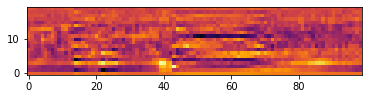

In [21]:
# TEST: Test shorter MFCC
# !pip install playsound
from playsound import playsound

idx = 10507

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y[idx])], 
            filenames[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y[idx])])
playsound(path)

In [27]:
# Split MFFCC coefficients into random train and test subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print("Train files : ",len(x_train))
print("Test files : ", len(x_test))

Train files :  25450
Test files :  12536


In [33]:
# Save features
np.savez(feature_sets_file, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, words = words)

In [34]:
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_test', 'y_test', 'words']

In [35]:
len(feature_sets['x_train'])

25450

In [36]:
print(feature_sets['y_test'])

[8. 2. 1. ... 4. 8. 8.]


In [37]:
print(feature_sets['x_train'][0])

[[ 9.98268157e+00  9.86446075e+00  9.66131497e+00 ...  1.34171584e+01
   1.29648415e+01  1.21614665e+01]
 [-9.81641741e+00 -7.17963250e+00 -8.89570469e+00 ... -3.00880893e+01
  -3.00827968e+01 -2.63430335e+01]
 [-4.21179078e+00  2.76909162e+00 -2.63032587e+00 ...  9.40435391e+00
   1.31365694e+01  7.16339859e+00]
 ...
 [ 7.62392838e+00 -1.61575584e+00  1.03481596e+00 ...  2.96046042e+00
   2.65182215e+00 -3.02095466e+00]
 [ 4.56104028e+00  5.87183192e-01  1.09039655e+00 ... -9.90274602e-02
  -4.52956197e+00 -6.40532541e+00]
 [ 2.98161635e-02  8.76717745e-01 -2.82792954e+00 ...  7.07371179e-01
   2.24843616e+00  1.37236158e+00]]
